In [ ]:
import pandas as pd

Orgs is largest file. NOTE: shouldn't we be using Investors.csv instead?

In [ ]:
# By default, I want to see everything

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [ ]:
orgs = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/organizations.csv")
len(orgs)

In [ ]:
investments = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/investments.csv")
len(investments)

In [ ]:
funding_rounds = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/funding_rounds.csv")
len(funding_rounds)

In [ ]:
investors = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/investors.csv")
len(investors)

In [ ]:
# Set keys to be UUID where applicable

investors = investors.set_index("uuid")
orgs = orgs.set_index("uuid")
funding_rounds = funding_rounds.set_index("uuid")

## What I want:

1. 3 line graphs, one per cloud company (stored in "Investors"):
2. Amount of funding (in "Funding_rounds") over time, 
3. One line per category—eg, military ("category_list", "category_groups_list" in orgs) on each graph 


## Questions I need to answer:
- Do I wany any funding round that any BigCloud participated in? Or only those where they were lead investor?

In [ ]:
# Filter to big cloud investors
cloud_investors = investors[investors.name.str.match("Microsoft|Amazon|Google", na=False)]

In [ ]:
# so I THINK this tells us that there are some funding rounds with multiple recorded investments. 
# but that not all funding rounds have recorded investments. 

print(len(investments.funding_round_uuid), len(investments.funding_round_uuid.unique()), len(funding_rounds))

In [31]:
cloud_investments = investments.join(cloud_investors, 
                 how="inner",
                 on="investor_uuid", 
                 rsuffix="_investor", 
                 validate="many_to_one")

cloud_investments

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,name_investor,type_investor,permalink_investor,cb_url_investor,rank_investor,created_at_investor,updated_at_investor,roles,domain,country_code,state_code,region,city,investor_types,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
346,b43dc207-fb9f-23ea-e985-7ba37d291574,Amazon investment in Series B - Fandom,investment,amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,https://www.crunchbase.com/investment/amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,NaN,2007-07-31 06:51:29,2018-02-13 00:55:07,2a644bf4-1728-5c3a-b88a-466f2b94d160,Series B - Fandom,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
402,09068243-cb88-0615-e91c-28cace08910c,Amazon investment in Series A - Amie Street,investment,amazon-invested-in-amiestreet-series-a--df452f16--09068243,https://www.crunchbase.com/investment/amazon-invested-in-amiestreet-series-a--df452f16--09068243,NaN,2007-08-06 21:59:16,2018-02-13 00:51:17,df452f16-5112-63fe-b043-f7fb2611c36e,Series A - Amie Street,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,True,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
481,33eceba6-8370-e6df-1442-f523f6d0bd61,Amazon investment in Seed Round - Delicious,investment,amazon-invested-in-delicious-seed--66da71ce--33eceba6,https://www.crunchbase.com/investment/amazon-invested-in-delicious-seed--66da71ce--33eceba6,NaN,2007-08-15 09:31:41,2018-02-13 00:52:12,66da71ce-b1e9-0c0e-929d-5d03c46f1e41,Seed Round - Delicious,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
876,391bb0ee-2097-8210-180f-2562cd33413c,Google investment in Series A - 23andMe,investment,google-invested-in-23andme-series-a--f261366b--391bb0ee,https://www.crunchbase.com/investment/google-invested-in-23andme-series-a--f261366b--391bb0ee,NaN,2007-10-15 17:17:12,2018-02-13 00:52:18,f261366b-4fbf-1840-ad71-b20ea0d9c7ce,Series A - 23andMe,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,organization,True,Google,organization,google,https://www.crunchbase.com/organization/google,361.0,2014-04-20 16:16:56,2024-09-17 15:11:58,"company,investor",google.com,USA,CA,California,Mountain View,NaN,313.0,2.610000e+07,2.610000e+07,USD,1998-09-04,NaN,https://www.facebook.com/Google,https://www.linkedin.com/company/google,https://x.com/google,https://images.crunchbase.com/image/upload/t_cb-default-original/fa8nmvofinznny6rkwvf
944,3dcca197-4a72-a1d3-fbde-ad4fa5429b66,Microsoft investment in Series C - Meta,investment,microsoft-invested-in-facebook-series-c--c26d2da6--3dcca197,https://www.crunchbase.com/investment/microsoft-invested-in-facebook-series-c--c26d2da6--3

In [32]:
cloud_investments_framts = cloud_investments.join(funding_rounds[["name", "org_name", "org_uuid", "raised_amount_usd"]], 
                 how="inner",
                 on="funding_round_uuid", 
                 rsuffix="_fr", 
                 validate=None)

In [33]:
cloud_investments_org_amts = cloud_investments_framts.join(orgs[["name", "category_list", "category_groups_list", "short_description"]],
                                                             how="inner",
                                                             on="org_uuid",
                                                             rsuffix="_org")

In [34]:
cloud_investments_org_amts

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,name_investor,type_investor,permalink_investor,cb_url_investor,rank_investor,created_at_investor,updated_at_investor,roles,domain,country_code,state_code,region,city,investor_types,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url,name_fr,org_name,org_uuid,raised_amount_usd,name_org,category_list,category_groups_list,short_description
346,b43dc207-fb9f-23ea-e985-7ba37d291574,Amazon investment in Series B - Fandom,investment,amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,https://www.crunchbase.com/investment/amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,NaN,2007-07-31 06:51:29,2018-02-13 00:55:07,2a644bf4-1728-5c3a-b88a-466f2b94d160,Series B - Fandom,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Series B - Fandom,Fandom,e84e93ea-a32f-cc22-e3d8-a44fe89764f8,10000000.0,Fandom,"Communities,E-Commerce,Gaming,Internet,Media and Entertainment,Video,Video Games","Commerce and Shopping,Community and Lifestyle,Gaming,Internet Services,Media and Entertainment,Video","Fandom is a developer of an entertainment media platform designed for fans to explore, contribute to, and celebrate."
402,09068243-cb88-0615-e91c-28cace08910c,Amazon investment in Series A - Amie Street,investment,amazon-invested-in-amiestreet-series-a--df452f16--09068243,https://www.crunchbase.com/investment/amazon-invested-in-amiestreet-series-a--df452f16--09068243,NaN,2007-08-06 21:59:16,2018-02-13 00:51:17,df452f16-5112-63fe-b043-f7fb2611c36e,Series A - Amie Street,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,True,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Series A - Amie Street,Amie Street,ff9aad78-dde3-4857-fea6-66e5c1ce98dd,NaN,Amie Street,"Media and Entertainment,Music,Music Streaming","Internet Services,Media and Entertainment,Music and Audio","Amie Street is a web-based social music store that enables members to discover, download and share music."
481,33eceba6-8370-e6df-1442-f523f6d0bd61,Amazon investment in Seed Round - Delicious,investment,amazon-invested-in-delicious-seed--66da71ce--33eceba6,https://www.crunchbase.com/investment/amazon-invested-in-delicious-seed--66da71ce--33eceba6,NaN,2007-08-15 09:31:41,2018-02-13 00:52:12,66da71ce-b1e9-0c0e-929d-5d03c46f1e41,Seed Round - Delicious,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Seed Round - Delicious,Delicious,b6786d44-5bac-b00a-32ab-067fc845c173,NaN,Delicious,"Social Bookmarking,Social Media","Content and Publishing,Internet Services,Media and Entertainment,Other",Delicious is a social bookmarking website which allows users to access the s

In [ ]:

cloud_investments_org_amts[cloud_investments_org_amts.apply(lambda x: "Big Data" in x["category_list"])]

In [ ]:
cloud_investors = investors[investors.name.str.match("Microsoft|Amazon|Google", na=False)]

In [27]:
cat_dict = {"Microsoft":"Microsoft", "Amazon":"Amazon", "Google": "Google"}


In [39]:
cloud_investments_org_amts['big_cloud'] = (cloud_investments_org_amts['investor_name']
                                           .str.extract(fr"\b({'|'.join(cat_dict.keys())})\b")[0].map(cat_dict)
                 )

In [40]:
cloud_investments_org_amts['big_cloud'].value_counts()

big_cloud
Google       3456
Microsoft    1359
Amazon        516
Name: count, dtype: int64

## Graphing example

In [ ]:
import pandas as pd
categorical = ["cat1","cat1","cat2","cat3","cat2","cat1","cat3","cat2",
               "cat1","cat3","cat3","cat3","cat2","cat1","cat2","cat3",
               "cat2","cat2","cat3","cat1","cat1","cat1","cat3"]
year = [2013,2014,2013,2015,2014,2014,2013,2014,2014,2015,2015,2013,
        2014,2014,2013,2014,2015,2015,2015,2013,2014,2015,2013]
df = pd.DataFrame({'categorical':categorical,
                   'year':year})


In [42]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (cloud_investments_org_amts.reset_index()
          .groupby(['created_at','big_cloud'], as_index=False)
          ["raised_amount_usd"].sum()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'investment sum'})
       )

In [50]:
cloud_investments_org_amts["created_at"]

346        2007-07-31 06:51:29
402        2007-08-06 21:59:16
481        2007-08-15 09:31:41
876        2007-10-15 17:17:12
944        2007-10-24 16:57:56
                  ...         
1173555    2025-04-09 13:01:15
1173556    2025-04-09 13:01:15
1173635    2025-04-09 23:46:03
1174401    2025-04-11 01:50:30
1174988    2025-04-11 23:39:57
Name: created_at, Length: 5331, dtype: object

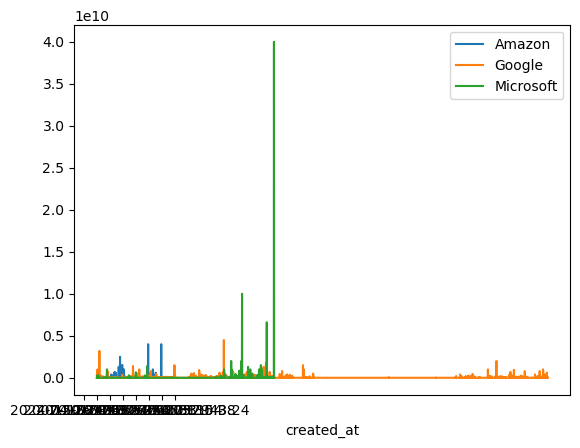

In [44]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('big_cloud'):
    data.plot(x='created_at', y='raised_amount_usd', ax=ax, label=key)

# Below here be dragons

Where I will keep code that I don't need but want to keep. 